# Save Politeness Data to CSV 

### Imports and Functions

In [132]:
import nltk
import convokit
import numpy as np
from convokit import Corpus, download
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt


In [112]:
!ls

README.md data      ipynb     src


In [84]:
def get_politeness_annotations(annotation_dict):
    annotion_values = list(annotation_dict.values())
    return annotion_values 

def tokenize_and_lowercase(utterance_str: str)->list:
    token_list = word_tokenize(utterance_str)
    lowercase_token_list = [str.lower(i) for i in token_list]
    return lowercase_token_list

def create_fil_df(df):
    columns = ["text", "tokenized_text", "avg_annotation", "politeness_std", "all_politeness_scores", "meta.Binary"]
    new_names = {"text": "original_text", 
                      "avg_annotation" : "avg_politeness_score", 
                     "meta.Binary": "binary_politeness_score"}
    
    fil_df = df[columns]
    fil_df = fil_df.rename(columns = new_names)
    return fil_df

## Loading, Processing, and Saving

Processing to do: 
- <s>Split text into tokens</s>
- Transform tokens into embeddings
- <s>Get original scores</s>
- <s>Filter to necessary columns</s>
- <s>Rename columns, reset_index</s>
- <s> save final df to csv in data folder </s>

In [107]:
wiki_corpus = Corpus(filename=download("wikipedia-politeness-corpus"))
stack_corpus = Corpus(filename=download("stack-exchange-politeness-corpus"))

wiki_df = wiki_corpus.get_utterances_dataframe()
stack_df = stack_corpus.get_utterances_dataframe()
corpus_df = pd.concat([wiki_df, stack_df]).reset_index().drop(columns = "id")

corpus_df.head(3)

Dataset already exists at /Users/ryanrodriguez/.convokit/downloads/wikipedia-politeness-corpus
Dataset already exists at /Users/ryanrodriguez/.convokit/downloads/stack-exchange-politeness-corpus


,timestamp,text,speaker,reply_to,conversation_id,meta.Normalized Score,meta.Binary,meta.Annotations,meta.parsed,vectors
0,NOT_RECORDED,Where did you learn English? How come you're t...,user,None,629705,-1.120049,-1,"{'A2UFD1I8ZO1V4G': 13, 'A2YFPO0N4GIS25': 9, 'A...","[{'rt': 3, 'toks': [{'tok': 'Where', 'tag': 'W...",[]
1,NOT_RECORDED,Thanks very much for your edit to the <url> ar...,user,None,244336,1.313955,1,"{'A2QN0EGBRGJU1M': 23, 'A2GSW5RBAT5LQ5': 16, '...","[{'rt': 0, 'toks': [{'tok': 'Thanks', 'tag': '...",[]
2,NOT_RECORDED,Sir i think u hav many friends on wiki who can...,user,None,627353,-0.247941,0,"{'A233ONYNWKDIYF': 17, 'A2UFD1I8ZO1V4G': 17, '...","[{'rt': 2, 'toks': [{'tok': 'Sir', 'tag': 'NNP...",[]


In [113]:
corpus_df["all_politeness_scores"] = corpus_df["meta.Annotations"].apply(get_politeness_annotations)
corpus_df["avg_annotation"] = corpus_df["all_politeness_scores"].apply(np.mean)
corpus_df['politeness_std'] = corpus_df['all_politeness_scores'].apply(np.std)
corpus_df["tokenized_text"] = corpus_df["text"].apply(tokenize_and_lowercase)
fil_df = create_fil_df(corpus_df)
# fil_df.to_csv("../data/politeness_data.csv", index=False)

## Examples

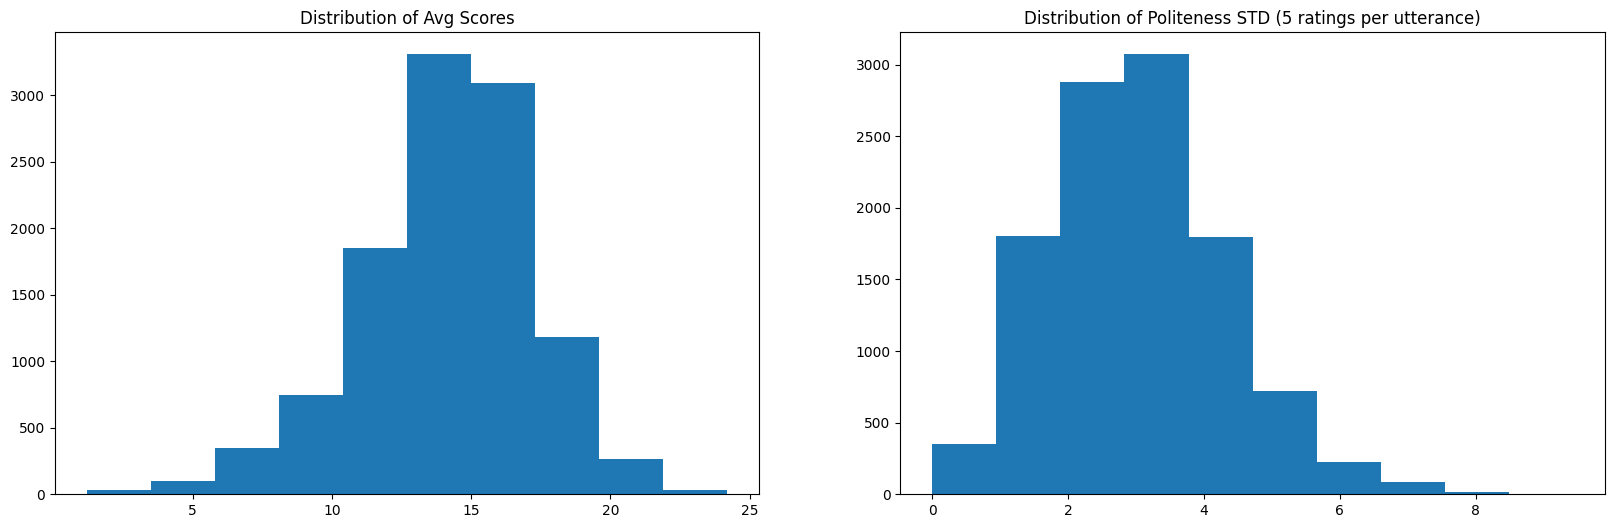

In [147]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6))

axs[0].hist(fil_df["avg_politeness_score"])
axs[0].set_title("Distribution of Avg Scores")

axs[1].hist(fil_df["politeness_std"])
axs[1].set_title("Distribution of Politeness STD (5 ratings per utterance)")

plt.show()

In [126]:
print("Most Impolite Comments:")
text = list(fil_df.sort_values("avg_politeness_score", ascending=True)["original_text"])
avg_score = list(fil_df.sort_values("avg_politeness_score", ascending=True)["avg_politeness_score"])
scores = list(fil_df.sort_values("avg_politeness_score", ascending=True)["all_politeness_scores"])


for i in range(10):
    print(f"Text: {text[i]}")
    print(f"Avg Score: {avg_score[i]}")
    print(f"All Scores: {scores[i]}")     
    print()

Most Impolite Comments:
Text: Phones generally don't even ring for more than 30 seconds. Why do you want to do this?
Avg Score: 1.2
All Scores: [1, 1, 2, 1, 1]

Text: Are you crazy down here?! What the heck is going on?
Avg Score: 1.2
All Scores: [1, 1, 1, 2, 1]

Text: What part of "use common sense" did not get through to you? Was it the "use," the "common," the "sense," or some combination thereafter?
Avg Score: 1.4
All Scores: [3, 1, 1, 1, 1]

Text: WTF? Downvotes? What for?
Avg Score: 1.6
All Scores: [2, 1, 3, 1, 1]

Text: I wasn't sure whether you were actually reading anything because facts seem to bounce off of you like bullets off of Superman. And you accuse ''me'' of fantasies?
Avg Score: 1.8
All Scores: [3, 3, 1, 1, 1]

Text: And this is why you're asking all the stupid questions?
Avg Score: 1.8
All Scores: [5, 1, 1, 1, 1]

Text: I'd like to know why someone voted to close this as Off-Topic.  Can you please explain your reasoning?
Avg Score: 1.8
All Scores: [1, 1, 1, 5, 1]

T

In [127]:
print("Most Polite Comments:")
text = list(fil_df.sort_values("avg_politeness_score", ascending=False)["original_text"])
avg_score = list(fil_df.sort_values("avg_politeness_score", ascending=False)["avg_politeness_score"])
scores = list(fil_df.sort_values("avg_politeness_score", ascending=False)["all_politeness_scores"])


for i in range(10):
    print(f"Text: {text[i]}")
    print(f"Avg Score: {avg_score[i]}")
    print(f"All Scores: {scores[i]}")     
    print()

Most Polite Comments:
Text: Thank you much! May I call upon you if I make mistakes or need help, then, please?
Avg Score: 24.2
All Scores: [25, 21, 25, 25, 25]

Text: Thank you for your kind comment.   Do you have a suggestion where the portals should be placed in the article?
Avg Score: 23.6
All Scores: [22, 25, 25, 25, 21]

Text: I'm very impressed with your work getting Niagara County's NRHP list filled out with pictures and articles!  Did you take most of those new pictures yourself?
Avg Score: 23.6
All Scores: [25, 25, 21, 24, 23]

Text: Good work on the canal junctions! Where appropriate, do you think we should give the nearest pedestrian access point, from the road (as opposed to canal) network?
Avg Score: 23.4
All Scores: [19, 25, 23, 25, 25]

Text: Yes, my feeling is to err on the safe side here. Thanks for your comment, is it okay if I quote you on the commons thread?
Avg Score: 23.2
All Scores: [23, 21, 23, 25, 24]

Text: Although I have yet to understand what some of your m